# **Group - 21**

1) Raghav Bhalla (2019379)

2) Ritesh Panwar (2019384) 

Mounting notebook to GDrive

Extracting valid 10K images from the large dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML
import random
from urllib.parse import urlparse 

In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/data/index.csv')
df_test = pd.read_csv('/content/drive/My Drive/data/test.csv')

In [ ]:
df_train

id                                                url
0        b09ea096f4daa42e  https://lh5.googleusercontent.com/-wBt6sklzbGs...
1        6648383c7b3a438c  https://lh3.googleusercontent.com/-OADWsOZq83E...
2        d485d9f770e40453  https://lh5.googleusercontent.com/-vtZFUTuFWGM...
3        e7cdfba9ec7e9dd5  https://lh4.googleusercontent.com/-Skq6Q-VUALk...
4        44806beb654e6410  https://lh4.googleusercontent.com/-6eIkjkr3j2w...
...                   ...                                                ...
1098456  2800eff98a2bab0d  https://lh4.googleusercontent.com/-E5MvhoNyxiQ...
1098457  71ba3a37d49384c7  http://lh4.ggpht.com/-7jF-xyz856w/RvomsNCBOgI/...
1098458  7273475580ecee77  http://lh5.ggpht.com/-g6iISelZtYE/SBefya9YdTI/...
1098459  c8d35dc747905510  https://lh4.googleusercontent.com/-D5C69MjJ6eg...
1098460  5752fed83d05d0ba  http://lh5.ggpht.com/-4B7xxHktcMw/RwIKqqpoS1I/...

[1098461 rows x 2 columns]

In [ ]:
df_train = df_train.sample(n=10000)
df_test = df_test.sample(n=1000)

In [ ]:
df_train = df_train.reset_index()
df_test = df_test.reset_index()

In [ ]:
df_train

index                id  \
0      215036  ad076894ee065ef7   
1      760883  daa9172e805282aa   
2       52032  3cc9df770085a632   
3      968016  fbe21b0a05f3a353   
4     1071531  819f81ba42664ffa   
...       ...               ...   
9995    75741  0420fda3dadb98ee   
9996   522099  a14a721ad7be25b4   
9997    59358  ea39466887c24240   
9998   181957  6dcd51ac896f5ea0   
9999   764012  d7aeee379644811c   

                                                    url  
0     http://lh3.ggpht.com/-X23kPwCPlj4/T_aVUDu0RJI/...  
1     https://lh3.googleusercontent.com/-PHkHddX151c...  
2     http://mw2.google.com/mw-panoramio/photos/medi...  
3     https://lh4.googleusercontent.com/-6sNKfawfpMk...  
4     http://lh4.ggpht.com/-KWBB8rvogmY/SGTpFsUxnmI/...  
...                                                 ...  
9995  https://lh3.googleusercontent.com/-u2ofMHnLvro...  
9996  http://lh5.ggpht.com/-DnWwxc6wOKU/Tp-oMi0XdJI/...  
9997  https://lh3.googleusercontent.com/-uvJBXdZPmpY...  
9998  https://lh4.googleusercontent.com/-kMYHlEJPMeA...  
9999  https://lh5.googleusercontent.com/-lTbIL9xdjWg...  

[10000 rows x 3 columns]

# **Data Preprocessing**

Deleting Image URLs which are not working/does not contain anything

In [ ]:
import requests

def url_exists(url: str):
    return requests.head(url, allow_redirects=True).status_code == 200

In [ ]:
urls = df_train.url.values
index = df_train.index.values

valid_sources = []

for i in range(df_train.shape[0]):
  print('Checked Image -', i)
  if url_exists(urls[i]):
    valid_sources.append(urlparse(urls[i]).netloc)
  else:
    df_train.drop(index[i], inplace=True)

Streaming output truncated to the last 5000 lines.
Checked Image - 5000
Checked Image - 5001
Checked Image - 5002
Checked Image - 5003
Checked Image - 5004
Checked Image - 5005
Checked Image - 5006
Checked Image - 5007
Checked Image - 5008
Checked Image - 5009
Checked Image - 5010
Checked Image - 5011
Checked Image - 5012
Checked Image - 5013
Checked Image - 5014
Checked Image - 5015
Checked Image - 5016
Checked Image - 5017
Checked Image - 5018
Checked Image - 5019
Checked Image - 5020
Checked Image - 5021
Checked Image - 5022
Checked Image - 5023
Checked Image - 5024
Checked Image - 5025
Checked Image - 5026
Checked Image - 5027
Checked Image - 5028
Checked Image - 5029
Checked Image - 5030
Checked Image - 5031
Checked Image - 5032
Checked Image - 5033
Checked Image - 5034
Checked Image - 5035
Checked Image - 5036
Checked Image - 5037
Checked Image - 5038
Checked Image - 5039
Checked Image - 5040
Checked Image - 5041
Checked Image - 5042
Checked Image - 5043
Checked Image - 5044
Chec

In [ ]:
df_train

index                id  \
0      215036  ad076894ee065ef7   
1      760883  daa9172e805282aa   
3      968016  fbe21b0a05f3a353   
4     1071531  819f81ba42664ffa   
6      854045  868e84e9949659b4   
...       ...               ...   
9994    81306  b4227118b2c07caf   
9995    75741  0420fda3dadb98ee   
9996   522099  a14a721ad7be25b4   
9997    59358  ea39466887c24240   
9999   764012  d7aeee379644811c   

                                                    url  
0     http://lh3.ggpht.com/-X23kPwCPlj4/T_aVUDu0RJI/...  
1     https://lh3.googleusercontent.com/-PHkHddX151c...  
3     https://lh4.googleusercontent.com/-6sNKfawfpMk...  
4     http://lh4.ggpht.com/-KWBB8rvogmY/SGTpFsUxnmI/...  
6     https://lh5.googleusercontent.com/-94yM6x2BYVE...  
...                                                 ...  
9994  https://lh6.googleusercontent.com/-61qAlxFo9Es...  
9995  https://lh3.googleusercontent.com/-u2ofMHnLvro...  
9996  http://lh5.ggpht.com/-DnWwxc6wOKU/Tp-oMi0XdJI/...  
9997  https://lh3.googleusercontent.com/-uvJBXdZPmpY...  
9999  https://lh5.googleusercontent.com/-lTbIL9xdjWg...  

[8537 rows x 3 columns]

In [ ]:
df_train.to_csv('df_train_preprocessed_10K.csv')

In [ ]:
df_train.to_csv('/content/drive/My Drive/data/df_train_preprocessed_10K.csv')

EDA 

In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/data/df_train_preprocessed_10K.csv')

In [ ]:
df_train

Unnamed: 0    index                id  \
0              0   215036  ad076894ee065ef7   
1              1   760883  daa9172e805282aa   
2              3   968016  fbe21b0a05f3a353   
3              4  1071531  819f81ba42664ffa   
4              6   854045  868e84e9949659b4   
...          ...      ...               ...   
8532        9994    81306  b4227118b2c07caf   
8533        9995    75741  0420fda3dadb98ee   
8534        9996   522099  a14a721ad7be25b4   
8535        9997    59358  ea39466887c24240   
8536        9999   764012  d7aeee379644811c   

                                                    url  
0     http://lh3.ggpht.com/-X23kPwCPlj4/T_aVUDu0RJI/...  
1     https://lh3.googleusercontent.com/-PHkHddX151c...  
2     https://lh4.googleusercontent.com/-6sNKfawfpMk...  
3     http://lh4.ggpht.com/-KWBB8rvogmY/SGTpFsUxnmI/...  
4     https://lh5.googleusercontent.com/-94yM6x2BYVE...  
...                                                 ...  
8532  https://lh6.googleusercontent.com/-61qAlxFo9Es...  
8533  https://lh3.googleusercontent.com/-u2ofMHnLvro...  
8534  http://lh5.ggpht.com/-DnWwxc6wOKU/Tp-oMi0XdJI/...  
8535  https://lh3.googleusercontent.com/-uvJBXdZPmpY...  
8536  https://lh5.googleusercontent.com/-lTbIL9xdjWg...  

[8537 rows x 4 columns]

In [ ]:
print("Number of Training Images: ", len(df_train))
# print("Number of Testing Images: ", len(df_test))

Number of Training Images:  8537


Displaying any 10 random images from the training data

In [ ]:
def image_display(image_url):
    css = "height: 350px; display: inline-block"
    image = f"<img style='{css}' src='{image_url}'/>"
    display(HTML(image))

In [ ]:
images = random.choices(df_train['url'], k=10)

print("Displaying 10 random images from the dataset \n---------------------------------------------\n")
for i in range(len(images)):
  print("Image -", i, "| Source:", images[i])
  image_display(images[i])
  print('\n')

Displaying 10 random images from the dataset 
---------------------------------------------

Image - 0 | Source: https://lh4.googleusercontent.com/-a-b32TZTCkc/UutjYun-fTI/AAAAAAAALtQ/oVdQtmb5a1o/s1600/




Image - 1 | Source: https://lh4.googleusercontent.com/-6EfjL_ecc-I/T6aol30WcpI/AAAAAAAAFRM/8V3e1j1tiyA/s1600/




Image - 2 | Source: http://lh4.ggpht.com/-dtpyg1tY6fQ/RsBT5eZWJHI/AAAAAAAAAFc/4MtHzdYWJYg/s1600/




Image - 3 | Source: http://lh4.ggpht.com/-GLeRWPKEm_0/SlKru3FmWLI/AAAAAAAADFA/SZP3lMD5szo/rj/




Image - 4 | Source: http://lh6.ggpht.com/-o6ZdnGTg078/TyWawcNzwSI/AAAAAAAAC9E/Adja2CjJmHw/s1600/




Image - 5 | Source: http://lh4.ggpht.com/-Vx6bReCsbgI/Rsu6aduHN3I/AAAAAAAABnY/gEL4EhZ1Obk/s1600/




Image - 6 | Source: http://lh3.ggpht.com/-LKy7SSiXm2o/TJBdq6P7fHI/AAAAAAAAIx0/Xo5nvp47jJc/s1600/




Image - 7 | Source: http://lh6.ggpht.com/-kR0M6ZpLHAA/SjUc1hIavSI/AAAAAAAACt8/xNDpWK8MmBA/s1600/




Image - 8 | Source: https://lh6.googleusercontent.com/-L6N3hzXTZpw/SOjDaW5opfI/AAAAAAAABVo/-VtcxmNta6A/s1600/




Image - 9 | Source: https://lh3.googleusercontent.com/-MqgriEQYkJ4/UD_AQprNVXI/AAAAAAAAL_0/nH2zqSRHpUM/s1600/


In [ ]:
from urllib.parse import urlparse
# urlparse('http://mw2.google.com/mw-panoramio/photos/medium/23135178.jpg')

In [ ]:
image_sources = []

In [ ]:
for url in df_train.url:
  image_sources.append(urlparse(url).netloc)
# urlparse('http://lh4.ggpht.com/-W1yyDQQuMNI/RsnUsrq8yYI/AAAAAAAAAmY/Yq5KGAgCqdU/s1600/').netloc

In [ ]:
image_sources

['lh3.ggpht.com',
 'lh3.googleusercontent.com',
 'lh4.googleusercontent.com',
 'lh4.ggpht.com',
 'lh5.googleusercontent.com',
 'lh4.googleusercontent.com',
 'lh6.googleusercontent.com',
 'lh4.googleusercontent.com',
 'lh5.googleusercontent.com',
 'lh5.ggpht.com',
 'lh3.googleusercontent.com',
 'lh5.googleusercontent.com',
 'lh5.ggpht.com',
 'lh6.ggpht.com',
 'lh4.googleusercontent.com',
 'lh5.googleusercontent.com',
 'lh4.googleusercontent.com',
 'lh3.googleusercontent.com',
 'lh4.googleusercontent.com',
 'lh3.googleusercontent.com',
 'lh3.googleusercontent.com',
 'lh3.googleusercontent.com',
 'lh4.googleusercontent.com',
 'lh3.ggpht.com',
 'lh4.googleusercontent.com',
 'lh4.googleusercontent.com',
 'lh4.ggpht.com',
 'lh5.googleusercontent.com',
 'lh5.ggpht.com',
 'lh6.googleusercontent.com',
 'lh6.googleusercontent.com',
 'lh3.googleusercontent.com',
 'lh5.googleusercontent.com',
 'lh3.googleusercontent.com',
 'lh6.ggpht.com',
 'lh3.ggpht.com',
 'lh5.ggpht.com',
 'lh5.ggpht.com',
 'lh

In [ ]:
unique_sources = set(image_sources)
unique_sources

{'lh3.ggpht.com',
 'lh3.googleusercontent.com',
 'lh4.ggpht.com',
 'lh4.googleusercontent.com',
 'lh5.ggpht.com',
 'lh5.googleusercontent.com',
 'lh6.ggpht.com',
 'lh6.googleusercontent.com'}

In [ ]:
pd.DataFrame(image_sources, columns = ['Image_Sources'])

Image_Sources
0                 lh3.ggpht.com
1     lh3.googleusercontent.com
2     lh4.googleusercontent.com
3                 lh4.ggpht.com
4     lh5.googleusercontent.com
...                         ...
8532  lh6.googleusercontent.com
8533  lh3.googleusercontent.com
8534              lh5.ggpht.com
8535  lh3.googleusercontent.com
8536  lh5.googleusercontent.com

[8537 rows x 1 columns]

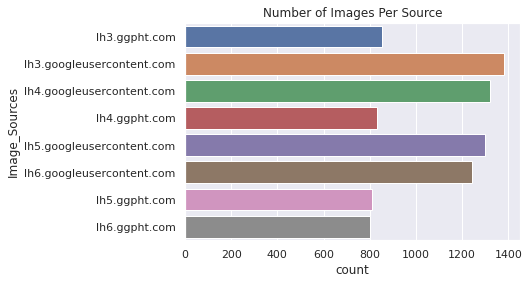

In [ ]:

sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Image_Sources", data = pd.DataFrame(image_sources, columns = ['Image_Sources'])).set(title='Number of Images Per Source')

# **Reducing Resolution of Image:**

In [ ]:
from PIL import Image as ImageP

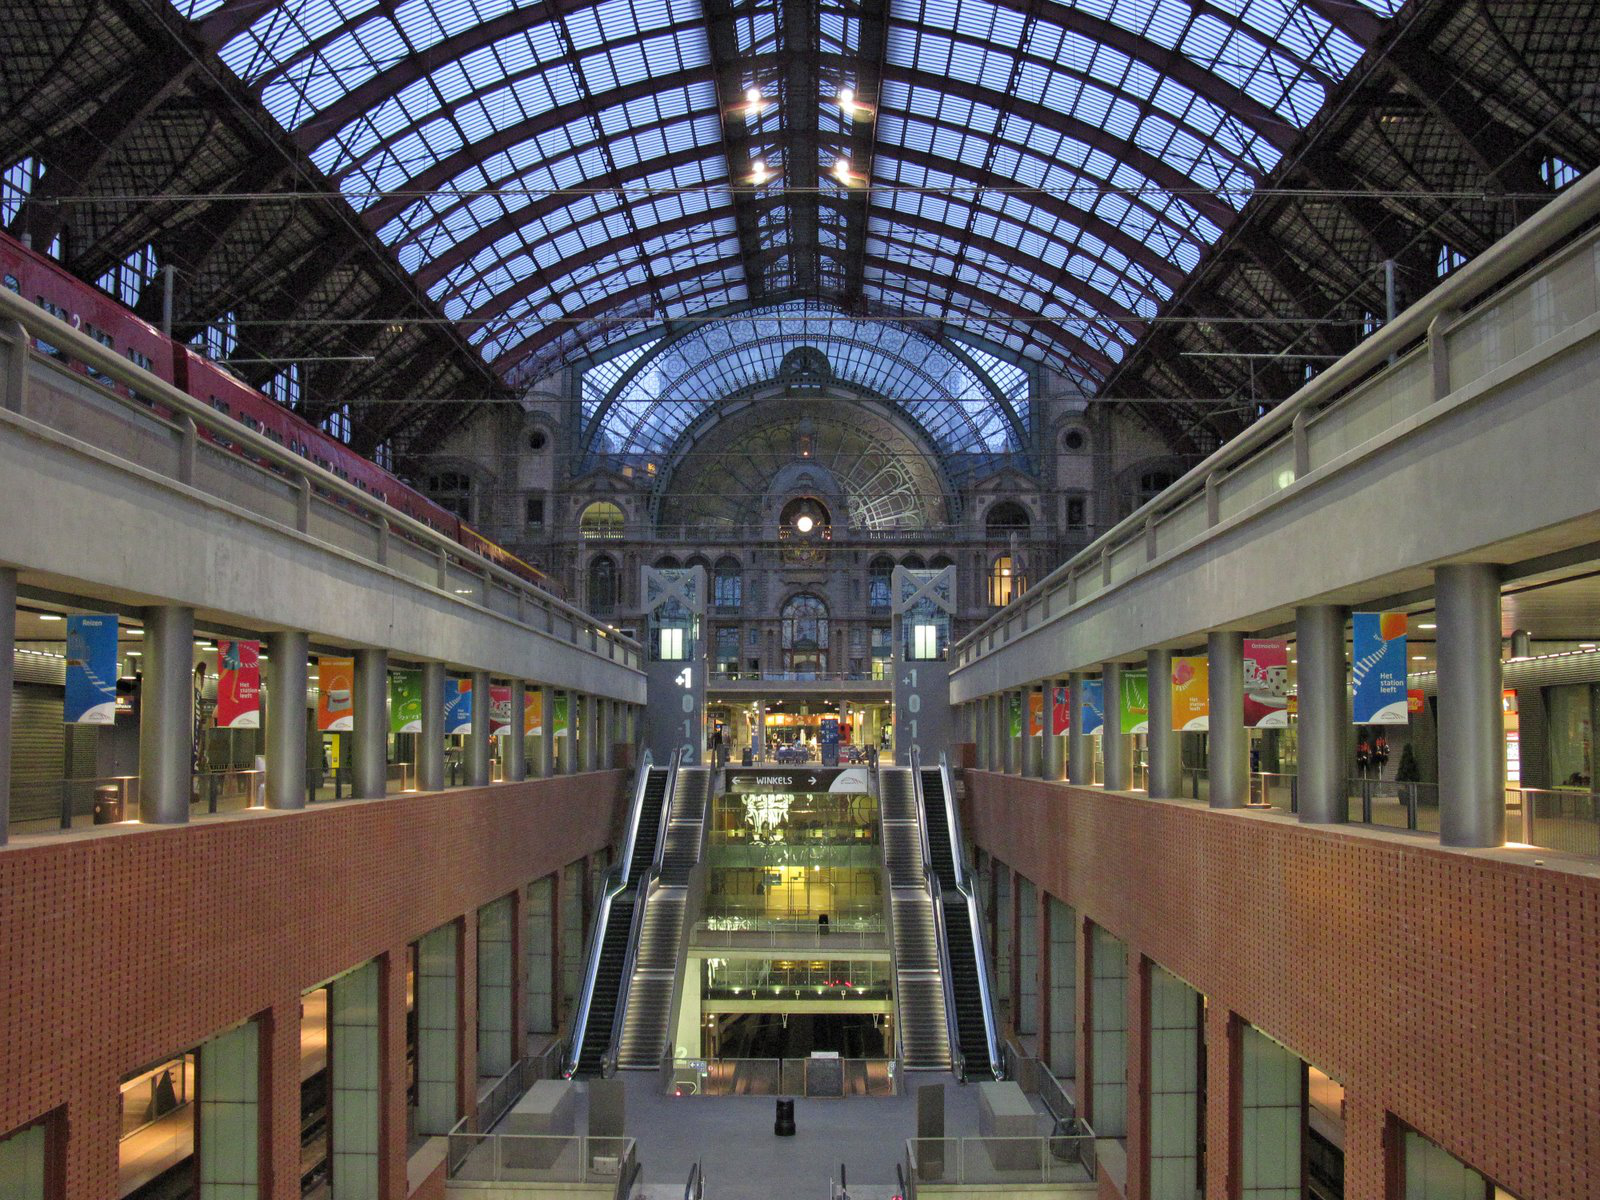

In [ ]:
ImageP.open(requests.get(df_train.url[12], stream=True).raw)

In [ ]:
image_file = ImageP.open(requests.get(df_train.url[12], stream=True).raw)
#Resizing Image
image_file.thumbnail((420, 420), ImageP.ANTIALIAS)
#Saving in Medium resolution
image_file.save("temp.jpg", quality=25)

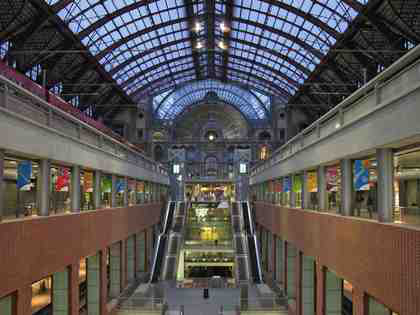

In [ ]:
ImageP.open('temp.jpg')

In [ ]:
#Saving Resize and medium Resolution images in Gdrive
urls = df_train.url.values
# index = 1

for index in range(8341, len(urls)):
  url = urls[index]
  image_file = ImageP.open(requests.get(url, stream=True).raw)
  #Resizing Image
  image_file.thumbnail((420, 420), ImageP.ANTIALIAS)
  #Saving in Medium resolution
  fname = '/content/drive/My Drive/data/images/' + str(index) + '.jpg'
  image_file.save(fname, quality=25)
  print("Saved Image -", index)
  # index += 1
  

Saved Image - 8341
Saved Image - 8342
Saved Image - 8343
Saved Image - 8344
Saved Image - 8345
Saved Image - 8346
Saved Image - 8347
Saved Image - 8348
Saved Image - 8349
Saved Image - 8350
Saved Image - 8351
Saved Image - 8352
Saved Image - 8353
Saved Image - 8354
Saved Image - 8355
Saved Image - 8356
Saved Image - 8357
Saved Image - 8358
Saved Image - 8359
Saved Image - 8360
Saved Image - 8361
Saved Image - 8362
Saved Image - 8363
Saved Image - 8364
Saved Image - 8365
Saved Image - 8366
Saved Image - 8367
Saved Image - 8368
Saved Image - 8369
Saved Image - 8370
Saved Image - 8371
Saved Image - 8372
Saved Image - 8373
Saved Image - 8374
Saved Image - 8375
Saved Image - 8376
Saved Image - 8377
Saved Image - 8378
Saved Image - 8379
Saved Image - 8380
Saved Image - 8381
Saved Image - 8382
Saved Image - 8383
Saved Image - 8384
Saved Image - 8385
Saved Image - 8386
Saved Image - 8387
Saved Image - 8388
Saved Image - 8389
Saved Image - 8390
Saved Image - 8391
Saved Image - 8392
Saved Image 

In [ ]:
import pickle
with open('/content/drive/My Drive/data/images_array', 'rb') as f:
    images_Arr = pickle.load(f)

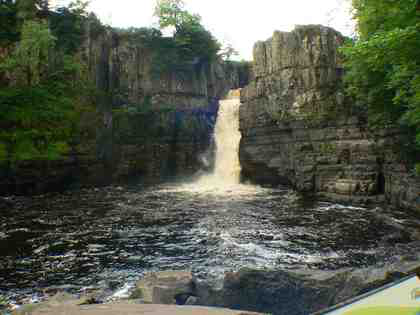

In [ ]:
images_Arr[2500]